In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Задача Коши

In [37]:
# точное решение
def y(x):
    return np.cos(x) + 11/8 * np.sin(x) - np.sin(3 * x) / 8

# производная
def dy(x):
    return 1/8 * (-8 * np.sin(x) + 11 * np.cos(x) - 3 * np.cos(3*x))
# z'
def f_xyz(x, y, z):
    return  np.sin(3 * x) - y

# вычисление узловых точек
def find_node_points(a, b, h):
    return list(np.arange(a, b+h, h))

# абсолютная погрешность решения задачи коши
def accuracy(x, ans):
    norm = 0.0
    for i in range(len(x)):
        norm += (ans[i] - y(x[i]))**2
    return norm**0.5

# абсолютная погрешность первлй производной

def deriviate_accuracy(x, ans):
    norm = 0.0
    for i in range(len(x)):
        norm += (ans[i] - dy(x[i]))**2
    return norm**0.5

# метод Рунге-Ромберга-Ричардсона
def runge_romberg_richardson(y1, y2, p):
    norm = 0.0
    for i in range(len(y2)):
        norm += (y1[i*2] - y2[i])**2
    return (norm**0.5) / (2**p - 1)


# Явный метод Эйлера

In [5]:
def euler_method(x, y0, z0, h, f = f_xyz):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        y.append(y[k] + h*z[k])
        z.append(z[k] + h*f(x[k], y[k], z[k]))
    return y, z 

In [23]:
a = 0
b = 1
h = 0.1
y0 = 1 
z0 = 1

x = find_node_points(a,b,h)

ans, dans = euler_method(x, y0, z0, h)
print('Точное решение в узлах сетки:\n')
for i in x:
    print(y(i))
print('\nРешение явным методом Эйлера в узлах сетки:')
ans

Точное решение в узлах сетки:

1.0
1.095335087334747
1.1826565985100712
1.2637609095815125
1.3400063289313764
1.412105804145645
1.4799880619680776
1.5427403364052044
1.5986384367651154
1.6452619839792255
1.6796849089715142

Решение явным методом Эйлера в узлах сетки:


[1,
 1.1,
 1.1900000000000002,
 1.2719552020666136,
 1.3476568288671773,
 1.4184721727433498,
 1.4851313391905228,
 1.5475807337763028,
 1.6049172912789595,
 1.6554101351103419,
 1.6966084378344461]

In [24]:
print('Точное значение первой производной решения в узлах сетки:\n')
for i in x:
    print(dy(i))
print('\nЗначение первой производной решения явным методом Эйлера в узлах сетки:')
dans

Точное значение первой производной решения в узлах сетки:

1.0
0.9100461271883551
0.8394213581455165
0.7849637277848696
0.7411563665165638
0.7007240333696709
0.6553947826156798
0.5967576095034269
0.5171382777807968
0.410413850001078
0.27269187198596256

Значение первой производной решения явным методом Эйлера в узлах сетки:


[1,
 0.9,
 0.819552020666134,
 0.7570162680056375,
 0.7081534387617244,
 0.6665916644717294,
 0.6244939458577998,
 0.573365575026567,
 0.5049284383138242,
 0.4119830272410433,
 0.2891800017533921]

In [34]:
# погрешности относительно точного решения
print('Погрешность решения:', accuracy(x, ans))
print('Погрешность производной:', deriviate_accuracy(x, dans))

Погрешность решения 0.026843839986022754
Погрешность производной 0.07386770273937948


In [39]:
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
x_ = find_node_points(a,b,h/2)
p = 1
ans_, dans_ = euler_method(x_, y0, z0, h/2)
print('Погрешность решения:', runge_romberg_richardson(ans_, ans, p))
print('Погрешность производной:', runge_romberg_richardson(dans_, dans, p))

Погрешность решения: 0.01348040979832055
Погрешность производной: 0.03806555717780243


# Метод Эйлера-Коши

In [40]:
def euler_сauchy_method(x, y0, z0, h, f = f_xyz):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        yk = y[k] + h*z[k]
        zk = z[k] + h*f(x[k], y[k], z[k])
        y.append(y[k] + h*(z[k] + zk) / 2)
        z.append(z[k] + h*(f(x[k], y[k], z[k]) + f(x[k+1], yk, zk)) / 2)
    return y, z

In [42]:
ans1, dans1 = euler_сauchy_method(x, y0, z0, h)
print('Решение явным методом Эйлера-Коши в узлах сетки:')
ans1

Решение явным методом Эйлера-Коши в узлах сетки:


[1,
 1.095,
 1.1819802020666135,
 1.2627670398516777,
 1.3387440428912831,
 1.4106420103583923,
 1.478398339964035,
 1.5410988338032254,
 1.5970078192031454,
 1.6436844109798665,
 1.678174918833161]

In [58]:
print('Значение первой производной решения методом Эйлера-Коши в узлах сетки:')
dans1

Значение первой производной решения методом Эйлера-Коши в узлах сетки:


[1,
 0.909776010333067,
 0.8387352642842204,
 0.7837420369072639,
 0.7393149225172952,
 0.6982206472441445,
 0.652232473846197,
 0.592984327356916,
 0.51284314969981,
 0.4057203050702455,
 0.2677482568615924]

In [59]:
# погрешности относительно точного решения
print('Погрешность решения:', accuracy(x, ans1))
print('Погрешность производной:', deriviate_accuracy(x, dans1))

Погрешность решения: 0.004235929445966067
Погрешность производной: 0.010042347796049336


In [46]:
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
p = 2
ans1_, dans1_ = euler_сauchy_method(x_, y0, z0, h/2)
print('Погрешность решения:', runge_romberg_richardson(ans1_, ans1, p))
print('Погрешность производной:', runge_romberg_richardson(dans1_, dans1, p))

Погрешность решения: 0.0010578711087742426
Погрешность производной: 0.002515280487477636


# Метод Рунге-Кутты 4-го порядка

In [48]:
def delta(xk, yk, zk, h, f):
    K1 = h * zk
    L1 = h * f(xk, yk, zk)
    
    K2 = h * (zk + L1 / 2)
    L2 = h * f(xk + h/2, yk + K1/2, zk + L1/2)
    
    K3 = h * (zk + L2 / 2)
    L3 = h * f(xk + h/2, yk + K2/2, zk + L2/2)
    
    K4 = h * (zk + L3)
    L4 = h * f(xk + h, yk + K3, zk + L3) 
    
    return ((K1 + 2*K2 + 2*K3 + K4)/6, (L1 + 2*L2 + 2*L3 + L4)/6)

def runge_kutta_metod(x, y0, z0, h, f = f_xyz):
    y = [y0]
    z = [z0]
    for k in range(len(x) - 1):
        delta_ = delta(x[k], y[k], z[k], h, f)
        y.append(y[k] + delta_[0])
        z.append(z[k] + delta_[1])
    return y, z

In [49]:
ans2, dans2 = runge_kutta_metod(x, y0, z0, h)
print('Решение методом Рунге-Кутты 4-го порядка в узлах сетки:')
ans2

Решение явным методом Рунге-Кутты 4-го порядка в узлах сетки:


[1,
 1.0953356271082453,
 1.1826576518617349,
 1.2637624036423156,
 1.3400081519779194,
 1.4121078170421064,
 1.4799901121773358,
 1.54274227328357,
 1.5986401267383616,
 1.6452633242066845,
 1.6796858382391104]

In [50]:
print('Значение первой производной решения методом  Рунге-Кутты 4-го порядка в узлах сетки:')
dans2

Значение первой производной решения методом  Рунге-Кутты 4-го порядка в узлах сетки:


[1,
 0.9100462590982228,
 0.8394216860191286,
 0.7849643032176742,
 0.7411572248774692,
 0.7007251912633723,
 0.655396236781026,
 0.596759337229289,
 0.517140238789805,
 0.41041598962515335,
 0.2726941253470335]

In [60]:
# погрешности относительно точного решения
print('Погрешность решения:', accuracy(x, ans2))
print('Погрешность производной:', deriviate_accuracy(x, dans2))

Погрешность решения: 4.94762437832343e-06
Погрешность производной: 4.597210310309191e-06


In [52]:
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
p = 4
ans2_, dans2_ =  runge_kutta_metod(x_, y0, z0, h/2)
print('Погрешность решения:', runge_romberg_richardson(ans2_, ans2, p))
print('Погрешность производной:', runge_romberg_richardson(dans2_, dans2, p))

Погрешность решения: 3.095778592171688e-07
Погрешность производной: 2.873745174207798e-07


# Метод Адамса

In [53]:
def adams_z(x, y, z, h, f, k):
    return z[k] + h*(
        55*f(x[k], y[k], z[k]) - 
        59*f(x[k-1], y[k-1], z[k-1]) +
        37*f(x[k-2], y[k-2], z[k-2]) -
        9*f(x[k-3], y[k-3], z[k-3])) / 24

def adams_y(x, y, z, h, f, k):
    return y[k] + h*(55*z[k] - 59*z[k-1] + 37*z[k-2] - 9*z[k-3]) / 24

def adams_method(x, y0, z0, h, f = f_xyz):
    y, z =  runge_kutta_metod(x[:4], y0, z0, h, f)
    for k in range(3, len(x)-1):
        y.append(adams_y(x, y, z, h, f, k))
        z.append(adams_z(x, y, z, h, f, k))
    return y, z

In [55]:
ans3, dans3 = adams_method(x, y0, z0, h)
print('Решение методом Адамса в узлах сетки:')
ans3

Решение методом Адамса порядка в узлах сетки:


[1,
 1.0953356271082453,
 1.1826576518617349,
 1.2637624036423156,
 1.3400910235943062,
 1.4122145726434183,
 1.4800771969519535,
 1.5427507994315532,
 1.5985056548991532,
 1.644931864659306,
 1.67911251213556]

In [56]:
print('Значение первой производной решения методом Адамса в узлах сетки:')
dans3

Значение первой производной решения методом Адамса в узлах сетки:


[1,
 0.9100462590982228,
 0.8394216860191286,
 0.7849643032176742,
 0.7409883565601074,
 0.7002992513856906,
 0.6546805447835414,
 0.5957298247676969,
 0.5158156928947453,
 0.4088473211225085,
 0.2709605708093236]

In [61]:
# погрешности относительно точного решения
print('Погрешность решения:', accuracy(x, ans3))
print('Погрешность производной:', deriviate_accuracy(x, dans3))

Погрешность решения: 0.0006937649836605093
Погрешность производной: 0.0029959626085283558


In [57]:
# погрешности с помошью метода Рунге-Ромберга-Ричардсона
p = 4
ans3_, dans3_ = adams_method(x_, y0, z0, h/2)
print('Погрешность решения:', runge_romberg_richardson(ans3_, ans3, p))
print('Погрешность производной:', runge_romberg_richardson(dans3_, dans3, p))

Погрешность решения: 4.209768918383403e-05
Погрешность производной: 0.00018467548098755282


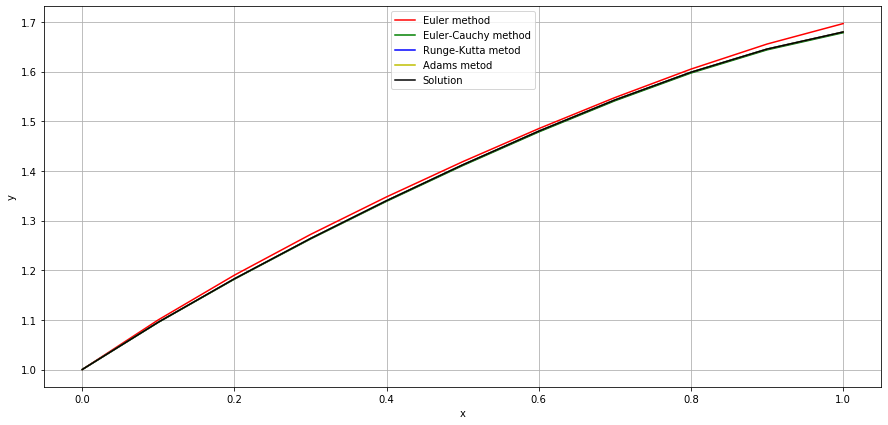

In [73]:
solution = []
for i in x:
    solution.append(y(i))

fig = plt.figure(figsize=(15, 7))

plt.plot(x, ans,'r', label = 'Euler method')
plt.plot(x, ans1,'g', label = 'Euler-Cauchy method')
plt.plot(x, ans2,'b', label = 'Runge-Kutta metod')
plt.plot(x, ans2,'y', label = 'Adams metod')
plt.plot(x, solution,'k', label = 'Solution')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(loc='upper center')

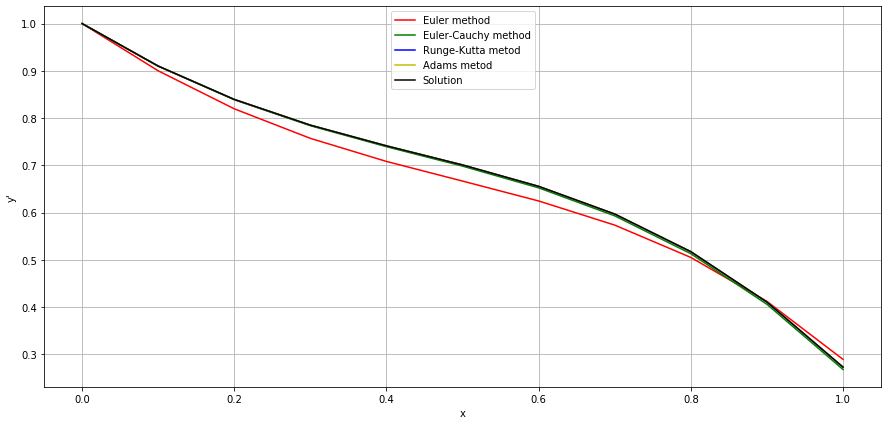

In [75]:
dsolution = []
for i in x:
    dsolution.append(dy(i))

fig = plt.figure(figsize=(15, 7))

plt.plot(x, dans,'r', label = 'Euler method')
plt.plot(x, dans1,'g', label = 'Euler-Cauchy method')
plt.plot(x, dans2,'b', label = 'Runge-Kutta metod')
plt.plot(x, dans2,'y', label = 'Adams metod')
plt.plot(x, dsolution,'k', label = 'Solution')

plt.xlabel('x')
plt.ylabel('y\'')

plt.grid()
plt.legend(loc='upper center')

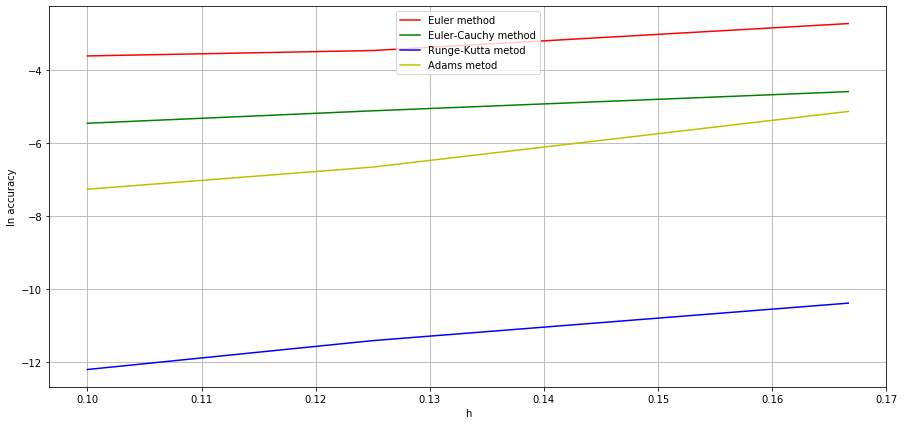

In [86]:
def accuracy_by_h(y0, z0, h, a, b, met):
    xi = find_node_points(a, b, h)
    y = met(xi, y0, z0, h)[0]
    return accuracy(xi, y)

hh = [(b - a) / i for i in range(6, 12, 2)]



y1 = list(map(lambda v: np.log(accuracy_by_h(y0, z0, v, a, b, euler_method)), hi))
y2 = list(map(lambda v: np.log(accuracy_by_h(y0, z0, v, a, b, euler_сauchy_method)), hi))
y3 = list(map(lambda v: np.log(accuracy_by_h(y0, z0, v, a, b, runge_kutta_metod)), hi))
y4 = list(map(lambda v: np.log(accuracy_by_h(y0, z0, v, a, b, adams_method)), hi))

fig = plt.figure(figsize=(15, 7))

plt.plot(hh, y1,'r', label = 'Euler method')
plt.plot(hh, y2,'g', label = 'Euler-Cauchy method')
plt.plot(hh, y3,'b', label = 'Runge-Kutta metod')
plt.plot(hh, y4,'y', label = 'Adams metod')

plt.xlabel('h')
plt.ylabel('ln accuracy')

plt.grid()
plt.legend(loc='upper center')